In [9]:
# Assignment 3
import pandas as pd
import numpy as np

Training model with 32 hidden units
Epoch 1/5
750/750 [==============================] - 12s 15ms/step - loss: 1.2812 - accuracy: 0.5539 - val_loss: 0.4453 - val_accuracy: 0.8690
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.3724 - accuracy: 0.8901 - val_loss: 0.3007 - val_accuracy: 0.9083
Epoch 3/5
750/750 [==============================] - 12s 16ms/step - loss: 0.2676 - accuracy: 0.9189 - val_loss: 0.2228 - val_accuracy: 0.9299
Epoch 4/5
750/750 [==============================] - 12s 15ms/step - loss: 0.2240 - accuracy: 0.9321 - val_loss: 0.1962 - val_accuracy: 0.9404
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 7378.3721 - accuracy: 0.9340
Accuracy with 32 hidden units: 0.9340000152587891
Training model with 64 hidden units
Epoch 1/5
750/750 [==============================] - 12s 16ms/step - loss: 1.4843 - accuracy: 0.4692 - val_loss: 0.6178 - val_accuracy: 0.8062
Epoch 2/5
750/750 [==============================] - 13s 17ms

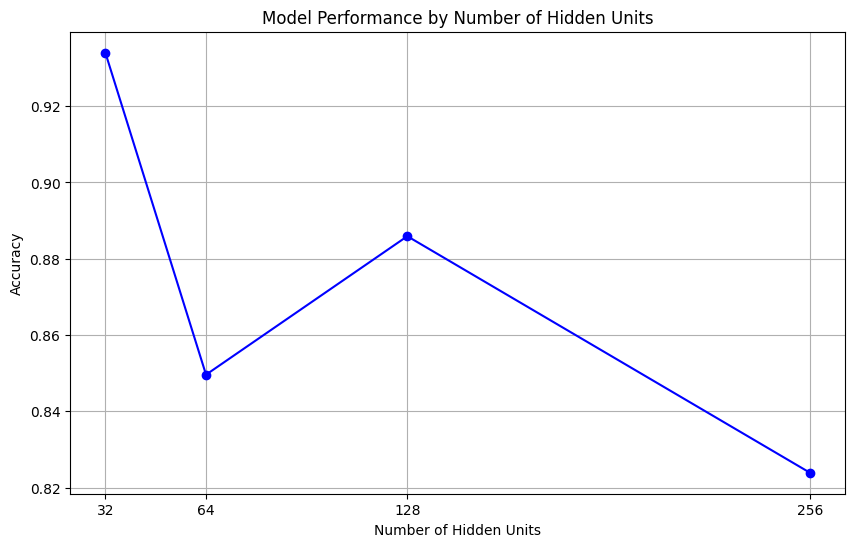

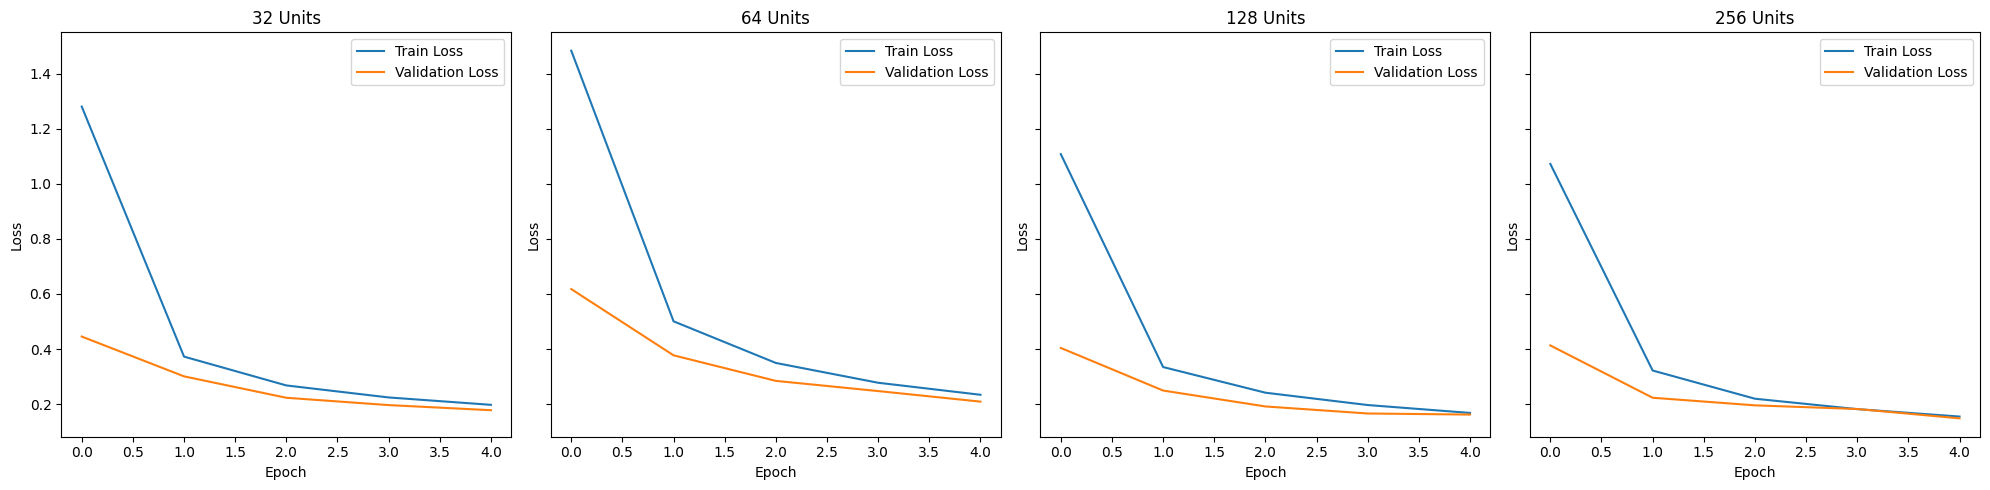

Best performing model used 32 hidden units with an accuracy of 0.9340000152587891


In [10]:
# Experiment 3
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

def build_and_train_model(hidden_units):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
    test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
    return history, test_acc

hidden_units_options = [32, 64, 128, 256]
performances = {}
histories = []

for units in hidden_units_options:
    print(f"Training model with {units} hidden units")
    history, test_acc = build_and_train_model(units)
    performances[units] = test_acc
    histories.append(history)
    print(f"Accuracy with {units} hidden units: {test_acc}")

accuracies = [performances[units] for units in hidden_units_options]
plt.figure(figsize=(10, 6))
plt.plot(hidden_units_options, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Performance by Number of Hidden Units')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.xticks(hidden_units_options)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, len(hidden_units_options), figsize=(20, 5), sharey=True)

for i, history in enumerate(histories):
    axs[i].plot(history.history['loss'], label='Train Loss')
    axs[i].plot(history.history['val_loss'], label='Validation Loss')
    axs[i].set_title(f'{hidden_units_options[i]} Units')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].legend()

plt.tight_layout()
plt.show()

best_units = max(performances, key=performances.get)
print(f"Best performing model used {best_units} hidden units with an accuracy of {performances[best_units]}")
